Three observable trends based on data

- Ride sharing is more commonly used in urban cities as compared to suburban or rural cities. Urban cities accounted for 68.4% of total rides, while suburban cities accounted for 26.3% and rural cities only 5.3%. 

- Urban cities tend to have a larger range of total number of rides. The average fare in urban areas are lower than suburban and rural cities and also have a smaller range ($\$$20-$\$$29). There are not as many total number of rides in rural cities but the range of the average fare is wider ($\$$24-$\$$43).

- There's more drivers in urban cities (80.9%) than suburban cities (16.5%) or rural cities (2.6%).

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()
#city_data.head()

In [2]:
# Combine the data into a single dataset
cityride_data = pd.merge(ride_data,city_data, on="city",how="left")
# Display the data table for preview
cityride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [61]:
# grouped_by_type = cityride_data.groupby('type')
# for key, group in grouped_by_type:
#     subgroup_by_city = group.groupby("city")
#     print(key)
#     print("Average Fare " + str(round(min(subgroup_by_city["fare"].mean()),2))
#           + "-" + str(round(max(subgroup_by_city["fare"].mean()),2)))
#     print("Total Number of Rides " + str(min(subgroup_by_city["ride_id"].count()))
#           + "-" + str(max(subgroup_by_city["ride_id"].count())))

Rural
Average Fare 24.12-43.28
Total Number of Rides 3-12
Suburban
Average Fare 24.7-36.42
Total Number of Rides 9-27
Urban
Average Fare 20.09-28.99
Total Number of Rides 12-39


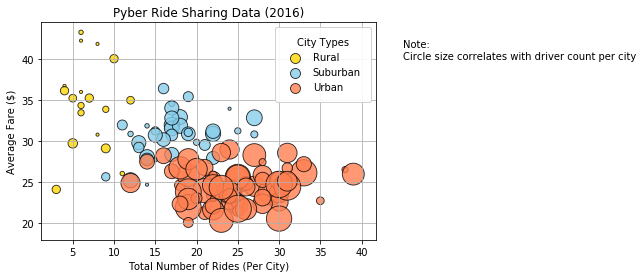

In [43]:
# Obtain the x and y coordinates for each of the three city types
grouped_by_type = cityride_data.groupby('type')
# Build the scatter plots for each city types
fig, ax = plt.subplots()
color_map = {'Rural':'gold', 'Suburban':'skyblue', 'Urban':'coral'}

#grouped_by_type = cityride_data.groupby('type')
#print(grouped_by_type.count())
for key, group in grouped_by_type:
    subgroup_by_city = group.groupby("city")
    x = subgroup_by_city["ride_id"].count()
    y = subgroup_by_city["fare"].mean()
    size = subgroup_by_city["driver_count"].mean()
    plt.scatter(x,y,s=size*10,color=color_map[key],alpha=0.8,linewidths=0.9,
                label=key,edgecolors="black")
    
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
lgd = ax.legend(numpoints=1, loc=1, borderpad=1, 
                frameon=True, framealpha=0.9, title="City Types")
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])
# Incorporate a text label regarding circle size
plt.text(45,40,"Note: \nCircle size correlates with driver count per city")
# Save Figure

plt.savefig("./pyber_ride_sharing_bubbleplot.png", bbox_inches = "tight")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

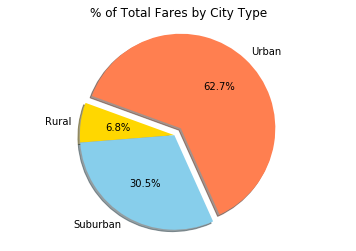

In [31]:
# Calculate Type Percents
type_fares = grouped_by_type["fare"].sum()
# Build Pie Chart
labels = "Rural","Suburban","Urban"
colors = 'gold', 'skyblue', 'coral'
explode = (0,0,0.1)

plt.pie(type_fares, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("./percent_total_fares_by_city_type.png", bbox_inches = "tight")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

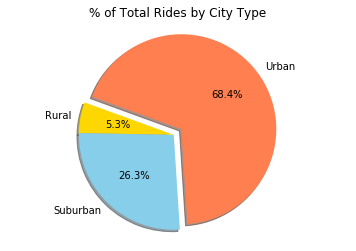

In [32]:
# Calculate Ride Percents
type_rides = grouped_by_type["ride_id"].count()
# Build Pie Chart
labels = "Rural","Suburban","Urban"
colors = 'gold', 'skyblue', 'coral'
explode = (0,0,0.1)

plt.pie(type_rides, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("./percent_total_rides_by_city_type.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

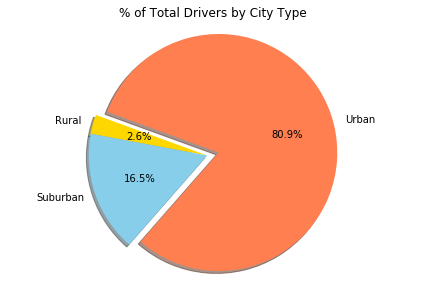

In [33]:
# Calculate Driver Percents
type_driver = city_data.groupby("type").sum()
# Build Pie Chart
labels = "Rural","Suburban","Urban"
colors = 'gold', 'skyblue', 'coral'
explode = (0,0,0.1)

plt.pie(type_driver, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.tight_layout()
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("./percent_total_drivers_by_city_type.png", bbox_inches = "tight")

In [13]:
# Show Figure
plt.show()